In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df=pd.read_csv('google_playstore.csv')

In [18]:
df.shape

(2312944, 24)

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
df.isnull().sum().sort_values(ascending = False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [21]:
len(df['Category'].unique())

48

In [26]:
df['Installs'].unique()


array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', nan,
       '50,000,000+', '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [27]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [28]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)


In [29]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [30]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)

In [31]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

In [32]:
df['Size'] = df['Size'].apply(lambda x: float(x))

In [33]:
df.dtypes['Size']

dtype('float64')

In [34]:
df['Size'].unique()

array([  10. ,    2.9,    3.7, ...,  512. ,  405. , 1000. ])

In [35]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],axis=1, inplace= True )

In [36]:
df["Content Rating"]=df["Content Rating"].replace("Unrated","Everyone")
df["Content Rating"]=df["Content Rating"].replace("Everyone 10+","Teen")
df["Content Rating"]=df["Content Rating"].replace("Mature 17+","Adults")
df["Content Rating"]=df["Content Rating"].replace("Adults only 18+","Adults")

In [37]:
df['Content Rating'].unique()


array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [38]:
df.head()

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,gib_score,Type
0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,0.0,USD,10.0,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,23.652448,Free
1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,0.0,USD,2.9,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,27.690292,Free
2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,0.0,USD,3.7,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,1.952480,Free
3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,0.0,USD,1.8,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,32.652703,Free
4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,0.0,USD,6.2,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,32.350720,Free


In [ ]:
df.to_csv('google_playstore_cleaned.csv')

In [22]:
df=pd.read_csv('google_playstore_cleaned.csv')

In [23]:
df.head()

,Unnamed: 0.1,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,gib_score,Type
0,0,0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,...,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,23.652448,Free
1,1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,...,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,27.690292,Free
2,2,2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,...,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,1.952480,Free
3,3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,...,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,32.652703,Free
4,4,4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,...,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,32.350720,Free


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'App Name', 'App Id', 'Category',
       'Rating', 'Rating Count', 'Installs', 'Minimum Installs',
       'Maximum Installs', 'Price', 'Currency', 'Size', 'Minimum Android',
       'Developer Id', 'Developer Website', 'Developer Email', 'Released',
       'Last Updated', 'Content Rating', 'Privacy Policy', 'Ad Supported',
       'In App Purchases', 'Editors Choice', 'Scraped Time', 'gib_score',
       'Type'],
      dtype='object')

In [5]:
df.shape

(1874858, 27)

In [9]:
df['Editors Choice'].unique()

array([False,  True])

In [10]:
df['Ad Supported'].unique()

array([False,  True])

In [11]:
len(df['Price'].unique())

849

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874858 entries, 0 to 1874857
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0.1       int64  
 1   Unnamed: 0         int64  
 2   App Name           object 
 3   App Id             object 
 4   Category           object 
 5   Rating             float64
 6   Rating Count       float64
 7   Installs           object 
 8   Minimum Installs   float64
 9   Maximum Installs   int64  
 10  Price              float64
 11  Currency           object 
 12  Size               float64
 13  Minimum Android    object 
 14  Developer Id       object 
 15  Developer Website  object 
 16  Developer Email    object 
 17  Released           object 
 18  Last Updated       object 
 19  Content Rating     object 
 20  Privacy Policy     object 
 21  Ad Supported       bool   
 22  In App Purchases   bool   
 23  Editors Choice     bool   
 24  Scraped Time       object 
 25  gib_score         

In [22]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [23]:
df['Free']

0          True
1          True
2          True
3          True
4          True
           ... 
2312939    True
2312940    True
2312941    True
2312942    True
2312943    True
Name: Free, Length: 2312944, dtype: bool

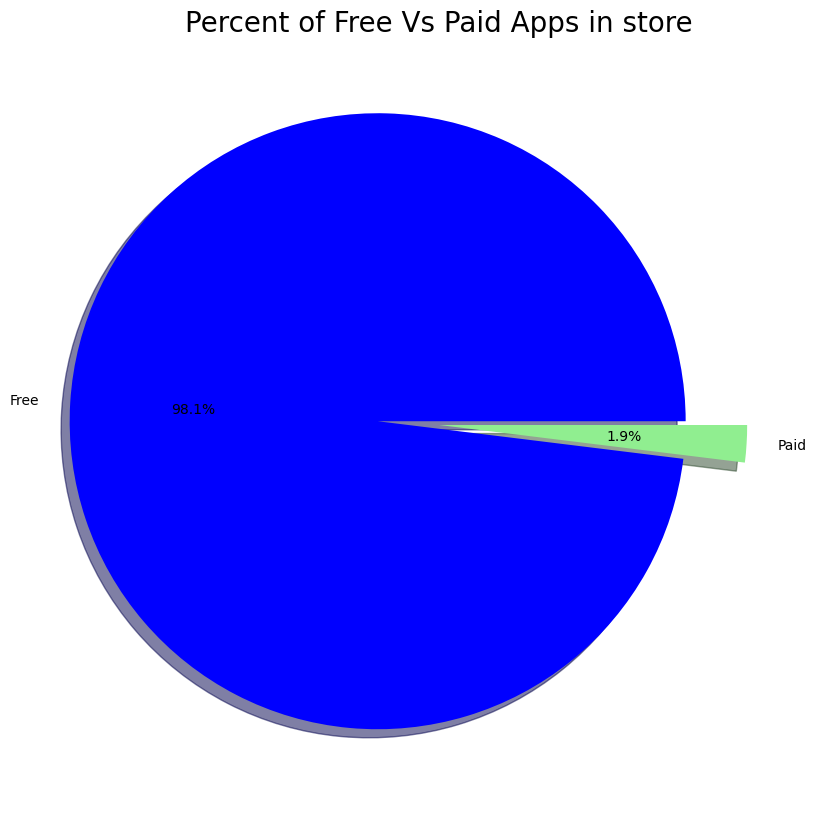

In [26]:
plt.figure(figsize=(10,10))
labels = ['Free','Paid']
sizes = df['Free'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In [15]:
type(df['Rating'].unique()[0])

numpy.float64

In [10]:
df['Rating'].fillna(0,inplace=True)

In [12]:
np.inf

inf

In [24]:
criteria = [df['Rating'].between(0,0.1), df['Rating'].between(0,1.5), df['Rating'].between(1.5,2.5),df['Rating'].between(2.5,3.5),df['Rating'].between(3.5,4.5),df['Rating'].between(4.5,5.1)]
values = [0,1, 2, 3,4,5]

In [25]:
df['Rating'] = np.select(criteria, values, 0)


In [26]:
df['Rating'].unique()

array([0, 4, 5, 2, 3, 1])

In [27]:
df.to_csv('google_playstore_cleaned2.csv')


In [2]:
import pandas as pd

In [3]:
df2=pd.read_csv('google_playstore_cleaned2.csv')

In [4]:
df2.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,gib_score,Type
0,0,0,0,Gakondo,com.ishakwe.gakondo,Adventure,0,0.0,10+,10.0,...,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35,23.652448,Free
1,1,1,1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4,64.0,"5,000+",5000.0,...,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35,27.690292,Free
2,2,2,2,Vibook,com.doantiepvien.crm,Productivity,0,0.0,50+,50.0,...,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35,1.952480,Free
3,3,3,3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5,5.0,10+,10.0,...,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35,32.652703,Free
4,4,4,4,GROW.me,com.horodyski.grower,Tools,0,0.0,100+,100.0,...,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35,32.350720,Free


In [7]:
df2['Size'].min()

0.0

In [ ]:
df2['Rating']

In [14]:
genres_ratings_df = df2.groupby(['Category'])[['Rating']].mean()
genres_installs_ratings = pd.merge(df2, genres_ratings_df, on='Category')
genres_installs_ratings['Category'].describe()

count       1874858
unique           48
top       Education
freq         190362
Name: Category, dtype: object

In [21]:
df_count=df2.groupby(['Category'])['App Id'].count()

In [38]:
df_count.sort_values()

Category
Action                      23552
Adventure                   19933
Arcade                      43143
Art & Design                16281
Auto & Vehicles             14048
Beauty                       9263
Board                        8778
Books & Reference           88908
Business                   113962
Card                         6752
Casino                       4234
Casual                      40806
Comics                       2339
Communication               38647
Dating                       5501
Education                  190362
Educational                 17789
Entertainment              113195
Events                      10399
Finance                     52806
Food & Drink                59339
Health & Fitness            67762
House & Home                11577
Libraries & Demo             4201
Lifestyle                   90814
Maps & Navigation           21025
Medical                     25143
Music                        3742
Music & Audio              130142
News 

In [25]:
list(df_count)

[23552,
 19933,
 43143,
 16281,
 14048,
 9263,
 8778,
 88908,
 113962,
 6752,
 4234,
 40806,
 2339,
 38647,
 5501,
 190362,
 17789,
 113195,
 10399,
 52806,
 59339,
 67762,
 11577,
 4201,
 90814,
 21025,
 25143,
 3742,
 130142,
 33080,
 2907,
 79652,
 32862,
 66185,
 42486,
 8895,
 8008,
 57097,
 20514,
 36194,
 37516,
 7025,
 117023,
 56460,
 9740,
 12216,
 6325,
 6230]

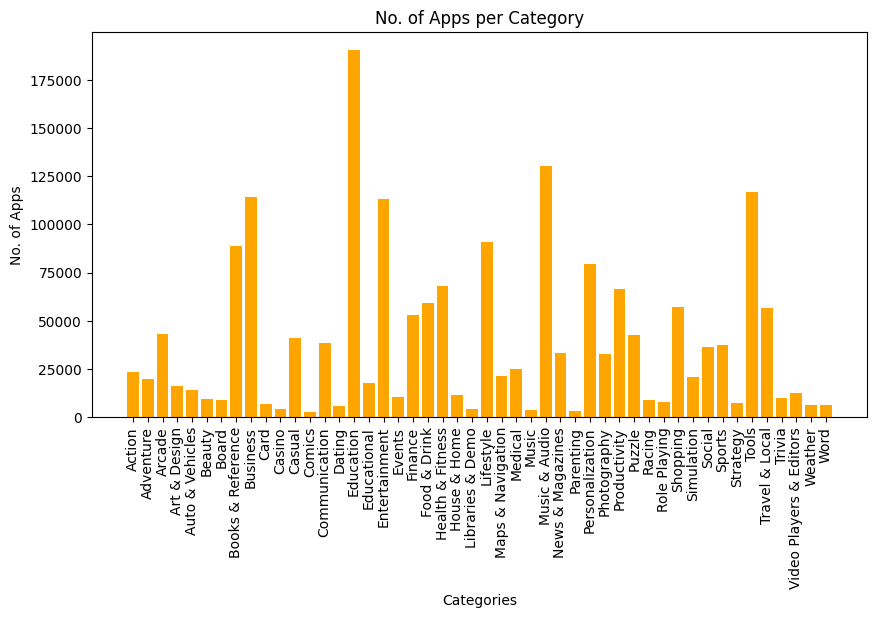

In [37]:
fig = plt.figure(figsize = (10, 5))
plt.bar(list(df_count.index), list(df_count), color ='orange')
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("No. of Apps")
plt.title("No. of Apps per Category")
plt.show()

In [54]:
df_count=df2[['Category','Maximum Installs']].groupby(['Category']).sum()

In [59]:
list(df_count['Maximum Installs'])

[26767737857,
 9002123507,
 20565739244,
 1749292266,
 2828180822,
 653677892,
 4414405743,
 8809417798,
 7939137926,
 3055630090,
 2007553321,
 23456612648,
 609393284,
 64054477201,
 1211576405,
 9014829495,
 7694123291,
 27283116071,
 121869081,
 9205417133,
 2253902887,
 7455663972,
 745614319,
 408117866,
 7778622055,
 4262306941,
 913208154,
 3046746655,
 21334290345,
 8098623709,
 377767385,
 16225936707,
 28716960324,
 43798470363,
 15868085723,
 13534500929,
 7561702406,
 11270008729,
 18501642936,
 24650996656,
 11596763308,
 6076265563,
 109857013909,
 17889578230,
 1849445996,
 29802399692,
 4466887836,
 2649026916]

In [50]:
df_count

Education                  190362
Music & Audio              130142
Tools                      117023
Business                   113962
Entertainment              113195
Lifestyle                   90814
Books & Reference           88908
Personalization             79652
Health & Fitness            67762
Productivity                66185
Food & Drink                59339
Shopping                    57097
Travel & Local              56460
Finance                     52806
Arcade                      43143
Puzzle                      42486
Casual                      40806
Communication               38647
Sports                      37516
Social                      36194
News & Magazines            33080
Photography                 32862
Medical                     25143
Action                      23552
Maps & Navigation           21025
Simulation                  20514
Adventure                   19933
Educational                 17789
Art & Design                16281
Auto & Vehicle

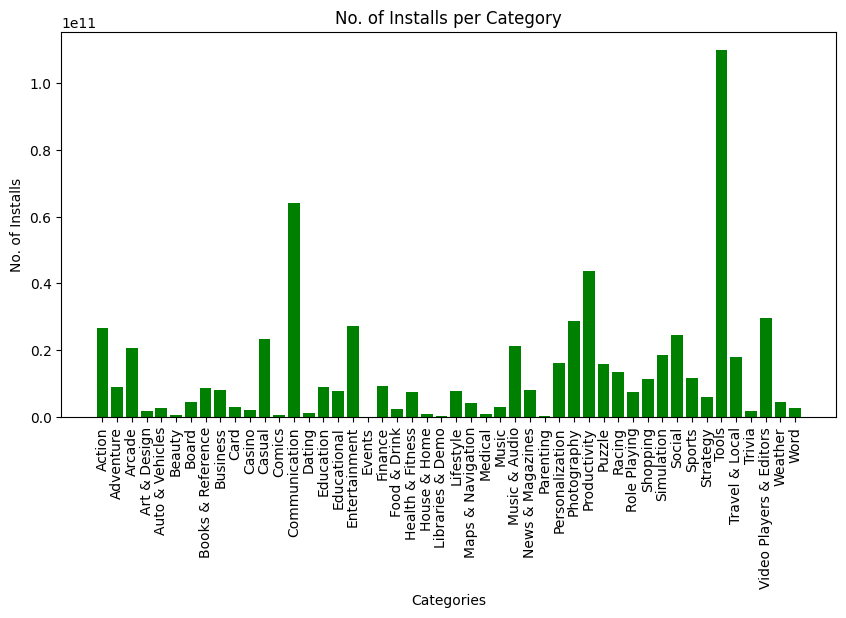

In [60]:
fig = plt.figure(figsize = (10, 5))
plt.bar(list(df_count.index), list(df_count['Maximum Installs']), color ='green')
plt.xticks(rotation=90)
plt.xlabel("Categories")
plt.ylabel("No. of Installs")
plt.title("No. of Installs per Category")
plt.show()

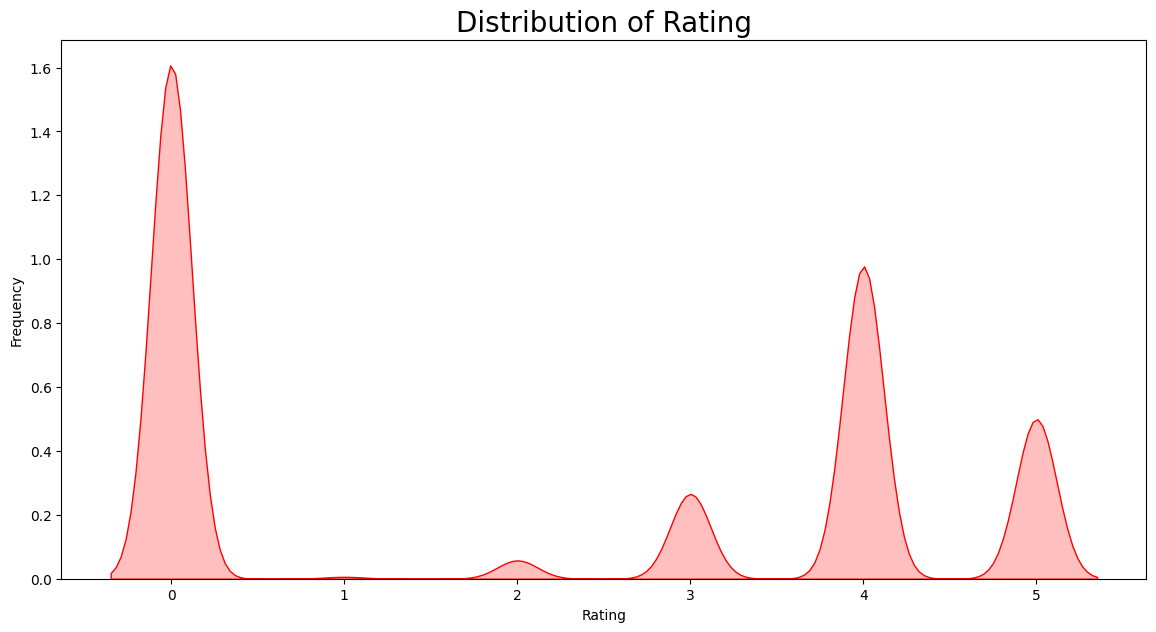

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,7))
g = sns.kdeplot(df2.Rating, color="Red", fill = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()




In [31]:
df2[df2['App Name']=='YouTube Music']

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,...,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,gib_score,Type
295366,295366,295366,364414,YouTube Music,com.google.android.youtube.tvmusic,Music & Audio,1,127.0,"10,000,000+",1.000000e+07,...,"Aug 3, 2020","Aug 03, 2020",Teen,https://policies.google.com/privacy,True,False,False,2021-06-16 02:31:35,1.957129,Free
939509,939509,939509,1158678,YouTube Music,com.google.android.apps.youtube.music,Music & Audio,4,2631022.0,"1,000,000,000+",1.000000e+09,...,"Nov 12, 2015","Jun 14, 2021",Teen,http://www.google.com/intl/en/policies/privacy/,True,False,False,2021-06-16 14:52:46,1.957129,Free
1521183,1521183,1521183,1876469,YouTube Music,com.google.android.music,Music & Audio,4,2629553.0,"1,000,000,000+",1.000000e+09,...,"Nov 12, 2015","Jun 14, 2021",Teen,http://www.google.com/intl/en/policies/privacy/,True,False,False,2021-06-16 06:38:37,1.957129,Free


In [3]:
df=pd.read_csv(r"F:\UNI's\Applied\NEU\Data Analytics Engg\CompViz Project\Google-Play-Store-Data-Visualization-master\Google-Play-Store-Data-Visualization-master\googleplaystore_user_reviews.csv")

In [4]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [18]:
res = [idx for idx in list(df['App'].unique()) if idx[0].lower() == 'G'.lower()]

In [19]:
res

['G Cloud Backup',
 'GANMA! - オリジナル漫画が全話無料で読み放題',
 'GCash - Buy Load, Pay Bills, Send Money',
 'GMAT Math Flashcards',
 'GMAT Question Bank',
 'GMX Mail',
 'GO Keyboard - Cute Emojis, Themes and GIFs',
 'GO Keyboard - Emoticon keyboard, Free Theme, GIF',
 'GO Notifier',
 'GO SMS Pro - Messenger, Free Themes, Emoji',
 'GO Weather - Widget, Theme, Wallpaper, Efficient',
 'GPS Map Free',
 'GPS Navigation & Offline Maps Sygic',
 'GPS Speedometer - Trip Meter - Altimeter',
 'GPS Speedometer and Odometer',
 'GPS Speedometer, Distance Meter',
 'GPS Status & Toolbox',
 'GPS Traffic Speedcam Route Planner by ViaMichelin',
 'GRE Flashcards',
 'GRE Prep & Practice by Magoosh',
 'GRE Tutor',
 'GS SHOP',
 'GUNSHIP BATTLE: Helicopter 3D',
 'Galactic Core Free Wallpaper',
 'Galaxy Attack: Alien Shooter',
 'Galaxy Gift',
 'Galaxy Live Wallpaper',
 "Game for KIDS: KIDS match'em",
 'Game of Thrones: Conquest™',
 'Gametime - Tickets to Sports, Concerts, Theater',
 'Garden Coloring Book',
 'Garden Fruit L

In [17]:
list(df['App'].unique())

['10 Best Foods for You',
 '104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室',
 '11st',
 '1800 Contacts - Lens Store',
 '1LINE – One Line with One Touch',
 '2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif',
 '21-Day Meditation Experience',
 '2Date Dating App, Love and matching',
 '2GIS: directory & navigator',
 '2RedBeans',
 '2ndLine - Second Phone Number',
 '30 Day Fitness Challenge - Workout at Home',
 '365Scores - Live Scores',
 '3D Blue Glass Water Keyboard Theme',
 '3D Color Pixel by Number - Sandbox Art Coloring',
 '3D Live Neon Weed Launcher',
 '4 in a Row',
 '4K Wallpapers and Ultra HD Backgrounds',
 '591房屋交易-租屋、中古屋、新建案、實價登錄、別墅透天、公寓套房、捷運、買房賣房行情、房價房貸查詢',
 '591房屋交易-香港',
 '7 Cups: Anxiety & Stress Chat',
 '7 Day Food Journal Challenge',
 '7 Minute Workout',
 '7 Weeks - Habit & Goal Tracker',
 '8 Ball Pool',
 '850 Sports News Digest',
 '8fit Workouts & Meal Planner',
 '95Live -SG#1 Live Streaming App',
 'A Call From Santa Claus!',
 'A Manual of Acupuncture',
 'A Word A Day',
 'A&E - Watch Full Ep